<a href="https://colab.research.google.com/github/gabrielgastaldo/Hotel-Booking-EDA-/blob/main/Data_Analysis_(Hotel_Booking)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Negócio

Nos últimos anos, os hotéis urbanos e resorts têm enfrentado altas taxas de cancelamento, levando a uma série de desafios, como receitas reduzidas e subutilização dos quartos do hotel. Reduzir essas taxas tornou-se uma prioridade para ambos os tipos de hotel, visando melhorar a eficiência na geração de receita. Este relatório analisa os cancelamentos de reservas de hotel e outros fatores que impactam a receita anual, visando oferecer insights para resolver esse problema.

# Suposições

1. Nenhum evento incomum entre 2015 e 2017 terá um impacto substancial nos dados utilizados.
2. As informações ainda estão atualizadas e podem ser usadas para analisar os possíveis planos de um hotel de maneira eficiente.
3. Não há consequências negativas não previstas para o hotel ao empregar qualquer técnica sugerida.
4. Os hotéis atualmente não estão utilizando nenhuma das soluções sugeridas.
5. O maior fator que afeta a eficácia na geração de receita são os cancelamentos de reservas.
6. Cancelamentos resultam em quartos vazios pelo tempo reservado.
7. Os clientes fazem reservas de hotel no mesmo ano em que fazem cancelamentos.

# Pergunta de Pesquisa:

1. Quais são as variáveis que afetam o cancelamento de reservas de hotéis?
2. Como podemos melhorar os cancelamentos de reservas de hotéis?
3. Como os hotéis serão auxiliados na tomada de decisões de preços e promoções?

# Hipóteses:

1. Mais cancelamentos ocorrem quando os preços são mais altos.
2. Quando há uma lista de espera mais longa, os clientes tendem a cancelar com mais frequência.
3. A maioria dos clientes faz suas reservas através de agentes de viagens offline.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
df = pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.shape

(119390, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
colunas_para_remover = [ 'arrival_date_year', 'arrival_date_month',
                        'arrival_date_week_number', 'arrival_date_day_of_month',
                        'stays_in_weekend_nights', 'stays_in_week_nights',
                        'reserved_room_type',
                        'assigned_room_type', 'booking_changes', 'deposit_type',
                        'agent', 'required_car_parking_spaces',
                        'total_of_special_requests', 'email', 'phone-number',  'credit_card']

In [ ]:
copia_df = df.copy()

In [ ]:
df = df.drop(columns=colunas_para_remover)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'adults', 'children', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'reservation_status', 'reservation_status_date',
       'name'],
      dtype='object')

In [ ]:
df.rename(columns={
    'hotel': 'hotel',
    'is_canceled': 'foi_cancelado',
    'lead_time': 'tempo_de_antecedencia',
    'adults': 'adultos',
    'children': 'criancas',
    'babies': 'bebes',
    'meal': 'refeicao',
    'country': 'pais',
    'market_segment': 'segmento_mercado',
    'distribution_channel': 'canal_distribuicao',
    'is_repeated_guest': 'cliente_repetidor',
    'previous_cancellations': 'cancelamentos_anteriores',
    'previous_bookings_not_canceled': 'reservas_anteriores_nao_canceladas',
    'company': 'empresa',
    'days_in_waiting_list': 'dias_em_lista_espera',
    'customer_type': 'tipo_cliente',
    'adr': 'tdm', #tarifa_diaria_media
    'reservation_status': 'status_reserva',
    'reservation_status_date': 'data_status_reserva',
    'name': 'nome',
}, inplace=True)

In [ ]:
df.isnull().sum()

hotel                                      0
foi_cancelado                              0
tempo_de_antecedencia                      0
adultos                                    0
criancas                                   4
bebes                                      0
refeicao                                   0
pais                                     488
segmento_mercado                           0
canal_distribuicao                         0
cliente_repetidor                          0
cancelamentos_anteriores                   0
reservas_anteriores_nao_canceladas         0
empresa                               112593
dias_em_lista_espera                       0
tipo_cliente                               0
tdm                                        0
status_reserva                             0
data_status_reserva                        0
nome                                       0
dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

hotel                                  0.000000
foi_cancelado                          0.000000
tempo_de_antecedencia                  0.000000
adultos                                0.000000
criancas                               0.003350
bebes                                  0.000000
refeicao                               0.000000
pais                                   0.408744
segmento_mercado                       0.000000
canal_distribuicao                     0.000000
cliente_repetidor                      0.000000
cancelamentos_anteriores               0.000000
reservas_anteriores_nao_canceladas     0.000000
empresa                               94.306893
dias_em_lista_espera                   0.000000
tipo_cliente                           0.000000
tdm                                    0.000000
status_reserva                         0.000000
data_status_reserva                    0.000000
nome                                   0.000000
dtype: float64

In [ ]:
df = df.drop(columns='empresa')

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.describe(include = 'object')

,hotel,refeicao,pais,segmento_mercado,canal_distribuicao,tipo_cliente,status_reserva,nome
count,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,5,177,7,5,4,3,81234
top,City Hotel,BB,PRT,Online TA,TA/TO,Transient,Check-Out,Robert Smith
freq,79302,91863,48586,56402,97730,89174,74745,48


In [ ]:
df.describe()

,foi_cancelado,tempo_de_antecedencia,adultos,criancas,bebes,cliente_repetidor,cancelamentos_anteriores,reservas_anteriores_nao_canceladas,dias_em_lista_espera,tdm
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,2.330754,102.003243
std,0.483168,106.903309,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,17.630452,50.485862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,0.000000,69.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,1.000000,161.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.000000,737.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,391.000000,5400.000000


In [ ]:
df = df[df['tdm']<5000]

# Data Analysis and Visualizations

C:\Users\Usuário\AppData\Local\Temp\ipykernel_16564\4261392389.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


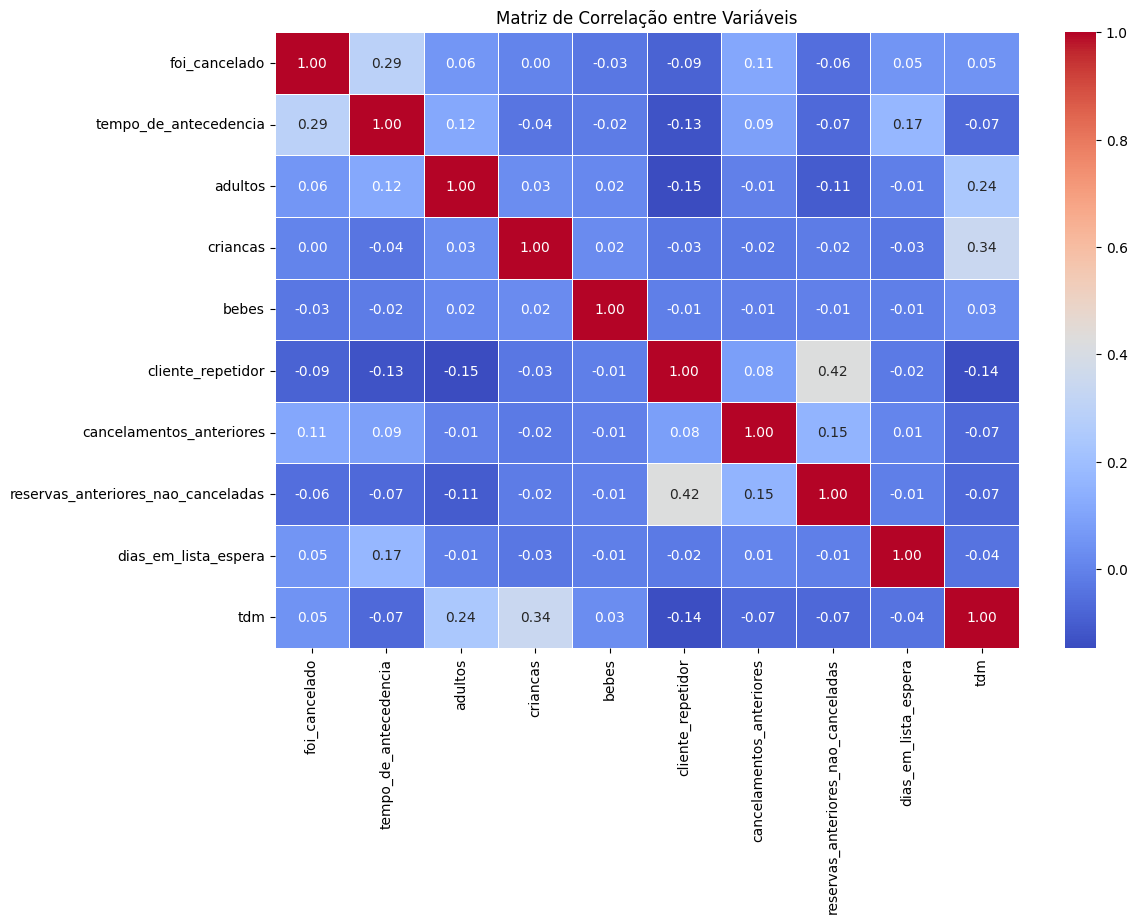

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

A análise das correlações mostra uma correlação de 0,42 entre "reservas anteriores não canceladas" e "cliente repetidor" e sugere uma relação moderada positiva entre essas duas variáveis. Isso indica uma associação razoável entre clientes que têm um histórico de reservas não canceladas e aqueles que são repetidores. Essa associação pode refletir uma satisfação contínua com a experiência no hotel, confiança na qualidade dos serviços ou preferência pelo local.  A análise das correlações também indica que a tarifa diária média tem uma relação leve a moderada com o número de adultos (0.23) e de crianças (0.33) na reserva. Isso sugere que reservas com mais adultos ou crianças tendem a ter tarifas ligeiramente mais altas. No entanto, outras variáveis não apresentaram correlações significativas, indicando que outros fatores influenciam mais fortemente essas tarifas.

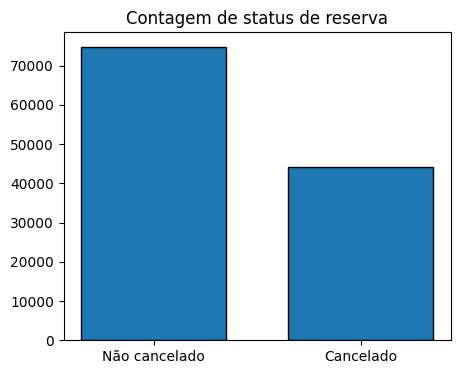

In [ ]:
cancelamentos_perc = df['foi_cancelado'].value_counts(normalize=True)
cancelamentos_perc

plt.figure(figsize=(5,4))
plt.title('Contagem de status de reserva')
plt.bar(['Não cancelado', 'Cancelado'], df['foi_cancelado'].value_counts(), edgecolor='k', width=0.7)
plt.show()

O gráfico de barras apresentado ilustra a porcentagem de reservas canceladas e não canceladas. Podemos ver que ainda há um número significativo de reservas não foram canceladas, porém vemos que 37% dos clientes optaram pelo cancelamento de suas reservas, o que impacta consideravelmente os lucros dos hotéis.

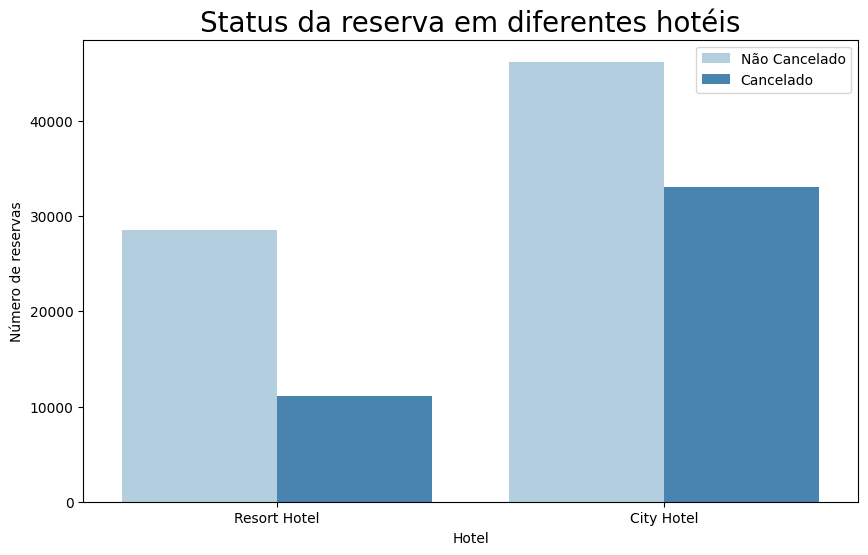

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x='hotel', hue='foi_cancelado', data=df, palette='Blues')
plt.legend(labels=['Não Cancelado', 'Cancelado'])
plt.title('Status da reserva em diferentes hotéis', size=20)
plt.xlabel('Hotel')
plt.ylabel('Número de reservas')
plt.show()

Em comparação com os hotéis resort, os hotéis urbanos têm mais reservas. É possível que os hotéis resort sejam mais caros do que aqueles nas cidades. Pode-se observar também que o número de cancelamentos nos hotéis urbanos é muito superior ao dos Resorts.

In [ ]:
hotel_resort = df[df['hotel'] == 'Resort Hotel']
hotel_resort['foi_cancelado'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: foi_cancelado, dtype: float64

In [ ]:
hotel_cidade = df[df['hotel'] == 'City Hotel']
hotel_cidade['foi_cancelado'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: foi_cancelado, dtype: float64

In [ ]:
hotel_resort = hotel_resort.groupby('data_status_reserva')[['tdm']].mean()
hotel_cidade = hotel_cidade.groupby('data_status_reserva')[['tdm']].mean()

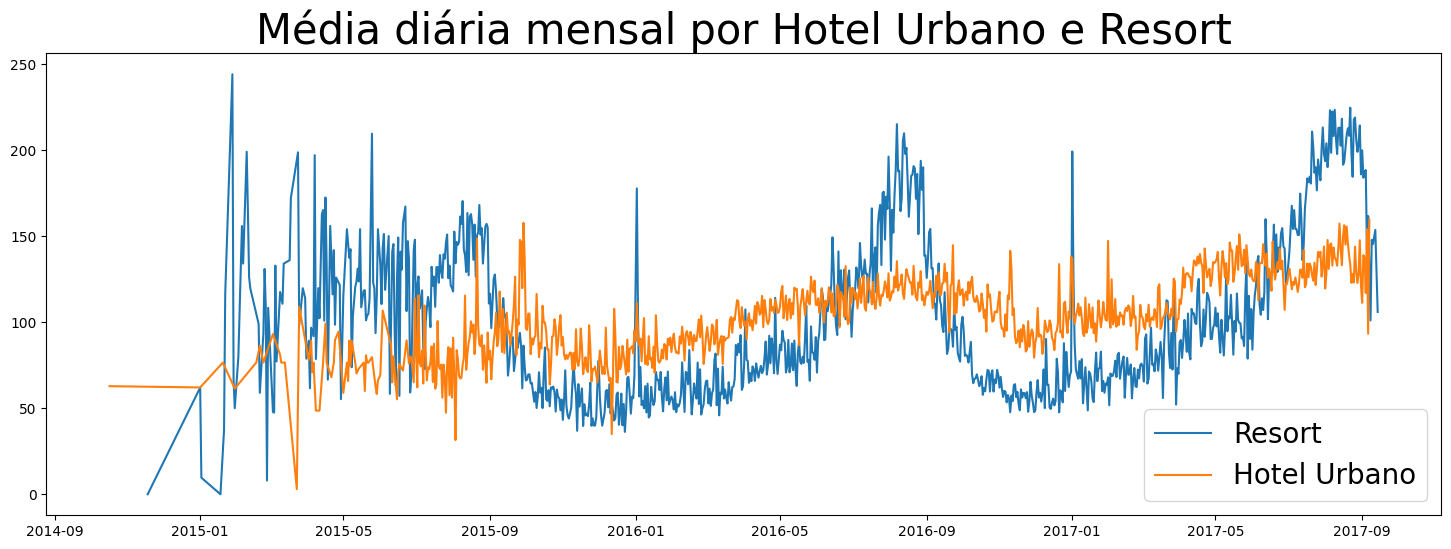

In [ ]:
plt.figure(figsize=(18, 6))
plt.title('Média diária mensal por Hotel Urbano e Resort', fontsize=30)
plt.plot(hotel_resort.index, hotel_resort['tdm'], label='Resort')
plt.plot(hotel_cidade.index, hotel_cidade['tdm'], label='Hotel Urbano')
plt.legend(fontsize=20)
plt.show()

O gráfico de linhas acima mostra que, em certos dias, a tarifa média diária de um hotel urbano é menor do que a de um hotel resort, e em outros dias, é ainda menor. É evidente que fins de semana e feriados podem resultar em aumento nas tarifas dos hotéis resort.

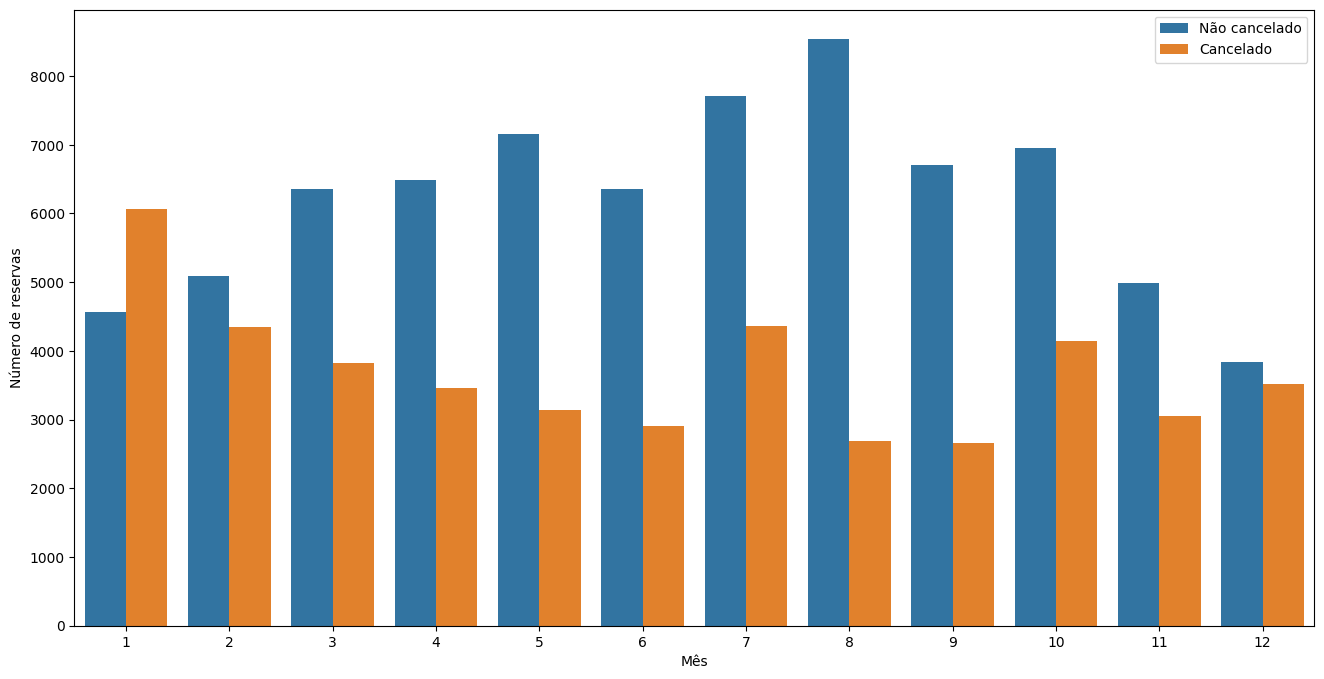

In [ ]:
df['mês'] = df['data_status_reserva'].dt.month
plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='mês', hue='foi_cancelado', data=df)
plt.xlabel('Mês')
plt.ylabel('Número de reservas')
plt.legend(['Não cancelado', 'Cancelado'])
plt.show()

Desenvolvemos o gráfico de barras agrupadas para analisar os meses com os níveis mais altos e mais baixos de reservas de acordo com o status da reserva. Como pode ser observado, tanto o número de reservas confirmadas quanto o número de reservas canceladas são maiores no mês de agosto, enquanto janeiro é o mês com o maior número de reservas canceladas.

In [ ]:
df['mês'] = df['data_status_reserva'].dt.month

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


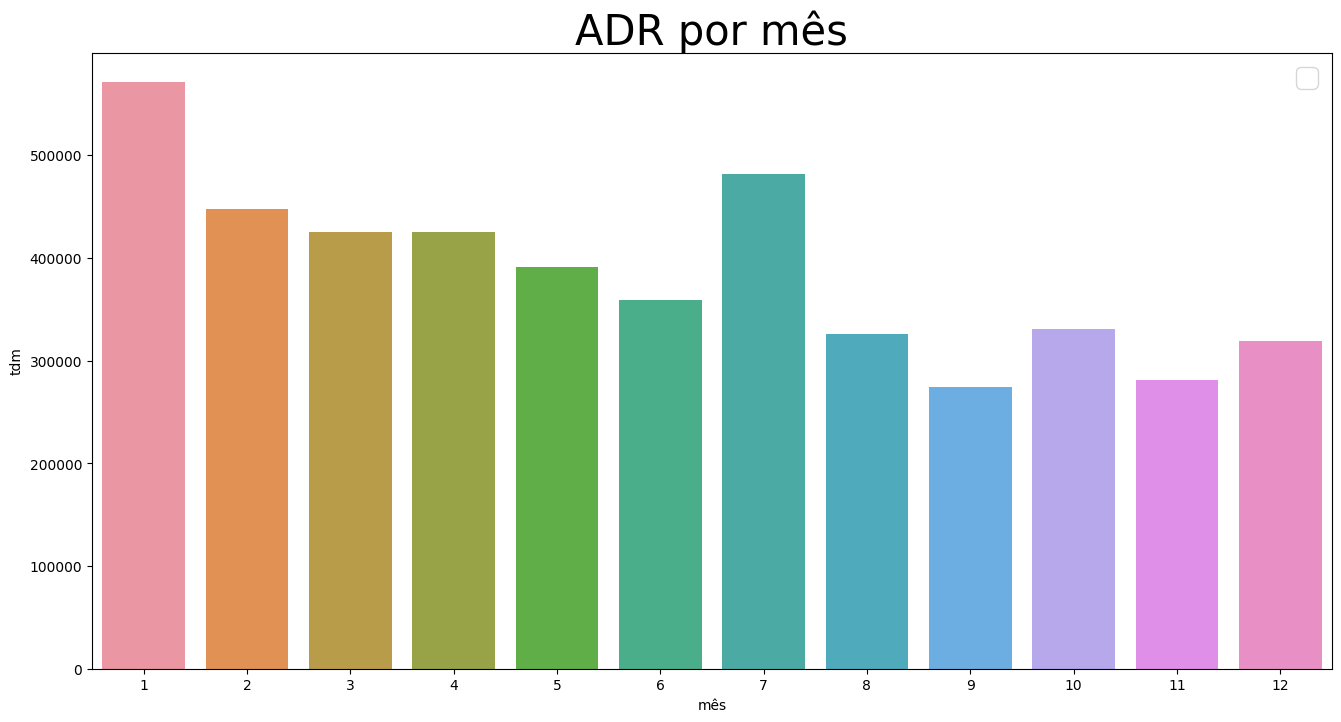

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('ADR por mês', fontsize=30)
sns.barplot(x='mês', y='tdm', data=df[df['foi_cancelado'] == 1].groupby('mês')[['tdm']].sum().reset_index())
plt.legend(fontsize=20)
plt.show()

Este gráfico de barras demonstra que os cancelamentos são mais comuns quando os preços são mais altos e menos comuns quando estão mais baixos. Isso pode ser evidênciado quando comparamos a taxa de cancelamento p/mês com o gráfico anterior. Portanto, o custo do alojamento aparenta ser o principal responsável pelo cancelamento.

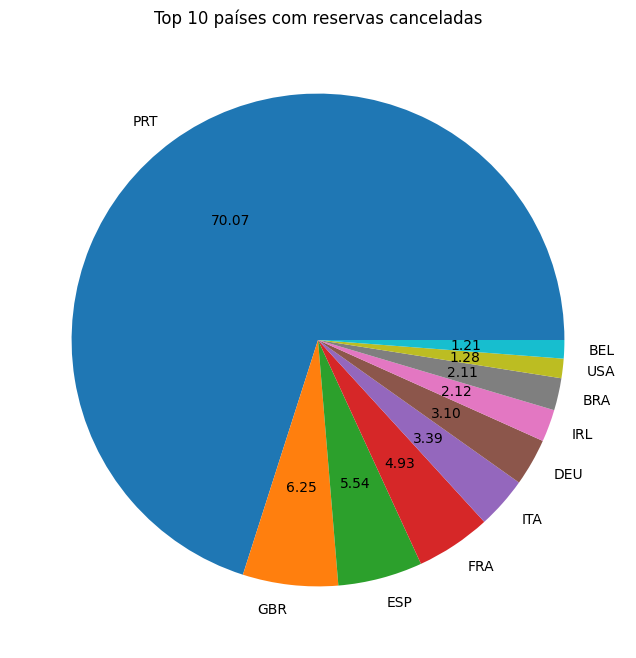

In [ ]:
cancelados = df[df['foi_cancelado'] == 1]
top_10_paises = cancelados['pais'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 países com reservas canceladas')
plt.pie(top_10_paises, autopct='%.2f', labels=top_10_paises.index)
plt.show()

Podemos observar que o país líder é Portugal, com o maior número de cancelamentos. Podemos ver que o número de cancelamentosem Portugal é mais de 11 vezes maior que o segundo colocado Reino Unido.

In [ ]:
df['segmento_mercado'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: segmento_mercado, dtype: int64

In [ ]:
df['segmento_mercado'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: segmento_mercado, dtype: float64

In [ ]:
cancelados['segmento_mercado'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: segmento_mercado, dtype: float64

Com base nos dados fornecidos, podemos observar que o segmento de mercado mais comum para reservas é o "Online TA" (Agentes de Viagens Online), representando aproximadamente 47% das reservas, seguido por "Offline TA/TO" (Agentes de Viagens Offline) e "Groups" (Grupos), com 20% e 17% das reservas, respectivamente. Por outro lado, quando se trata de reservas canceladas, o padrão é semelhante, com o segmento "Online TA" tendo a maior proporção de cancelamentos (aproximadamente 47%), seguido por "Groups" com cerca de 27%, e "Offline TA/TO" com cerca de 19%. Isso sugere que os clientes que fazem reservas por meio de agentes de viagens online têm uma probabilidade maior de cancelar suas reservas em comparação com outros segmentos de mercado. As reservas diretas (Direct) têm a menor proporção tanto de reservas quanto de cancelamentos, representando aproximadamente 10% e 4%, respectivamente. Isso pode indicar que os clientes que reservam diretamente têm uma maior probabilidade de manter suas reservas.

In [ ]:
nao_cancelados = df[df['foi_cancelado'] == 0]

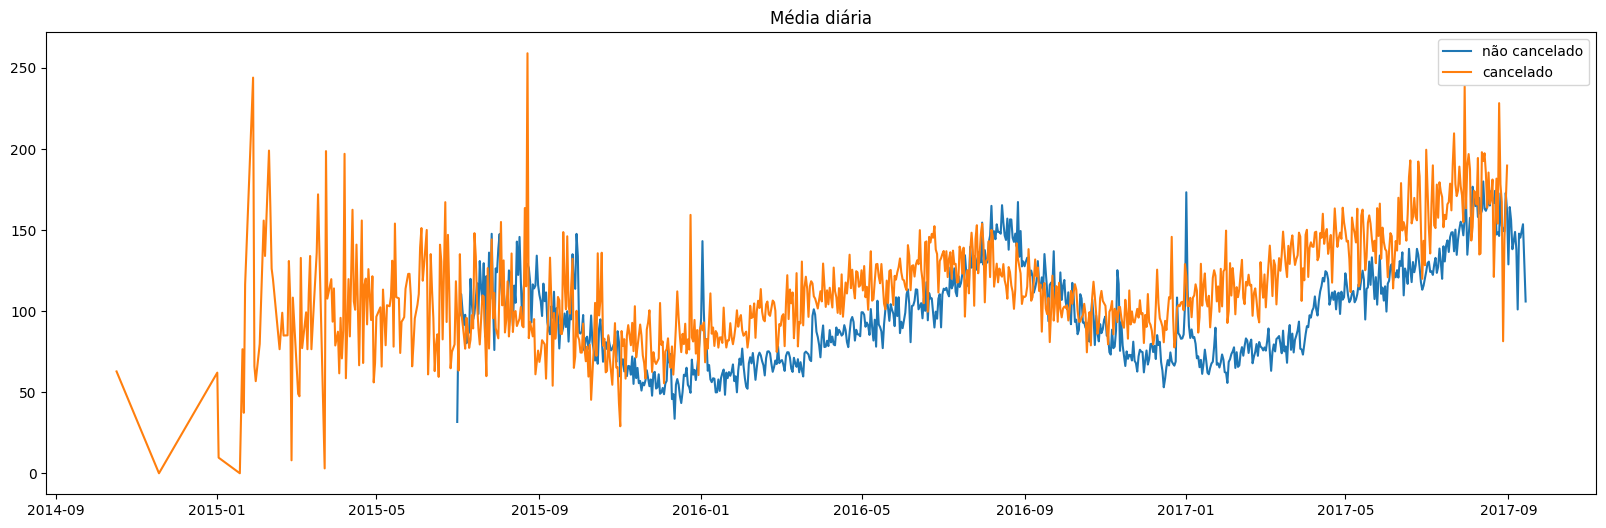

In [ ]:
cancelados_adr = cancelados.groupby('data_status_reserva')[['tdm']].mean()
cancelados_adr.reset_index(inplace=True)
cancelados_adr.sort_values('data_status_reserva', inplace=True)

nao_cancelados_adr = nao_cancelados.groupby('data_status_reserva')[['tdm']].mean()
nao_cancelados_adr.reset_index(inplace=True)
nao_cancelados_adr.sort_values('data_status_reserva', inplace=True)

plt.figure(figsize=(20, 6))
plt.title('Média diária')
plt.plot(nao_cancelados_adr['data_status_reserva'], nao_cancelados_adr['tdm'], label='não cancelado')
plt.plot(cancelados_adr['data_status_reserva'], cancelados_adr['tdm'], label='cancelado')
plt.legend()
plt.show()

In [ ]:
cancelados_adr = cancelados_adr[(cancelados_adr['data_status_reserva'] > '2016') & (cancelados_adr['data_status_reserva'] < '2017-09')]
nao_cancelados_adr = nao_cancelados_adr[(nao_cancelados_adr['data_status_reserva'] > '2016') & (nao_cancelados_adr['data_status_reserva'] < '2017-09')]

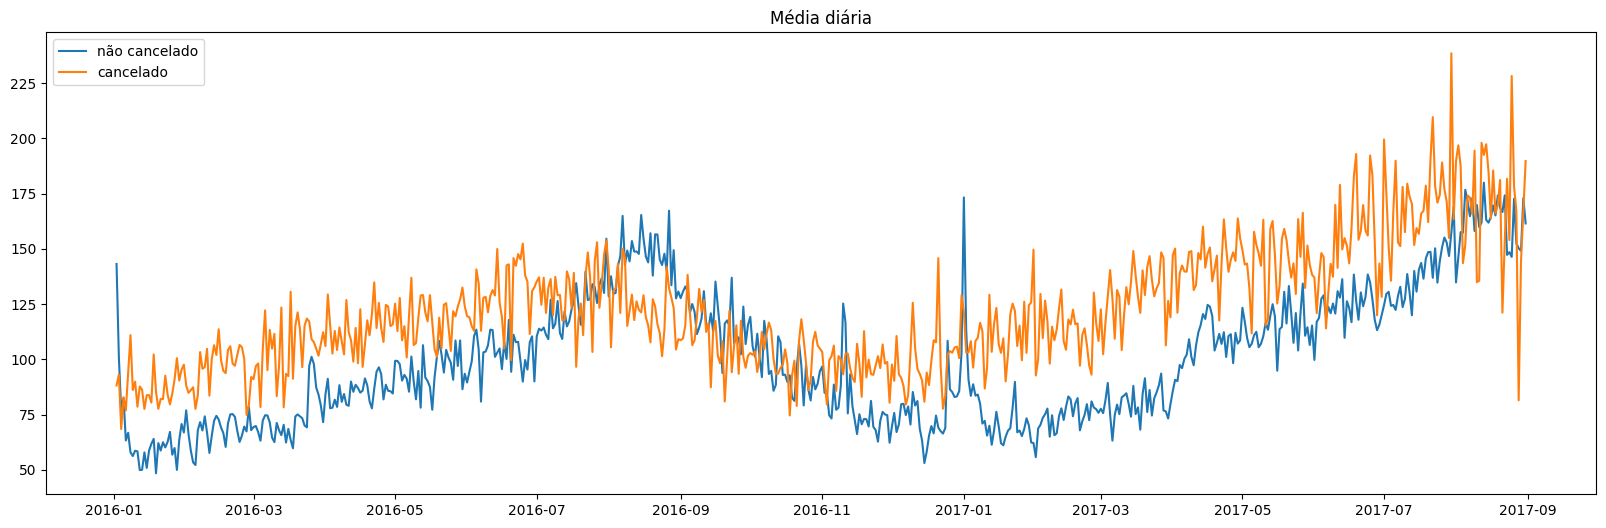

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Média diária')
plt.plot(nao_cancelados_adr['data_status_reserva'], nao_cancelados_adr['tdm'], label='não cancelado')
plt.plot(cancelados_adr['data_status_reserva'], cancelados_adr['tdm'], label='cancelado')
plt.legend()
plt.show()

Como visto no gráfico, as reservas são canceladas quando a tarifa diária média é mais alta do que quando não é cancelada. Isso confirma claramente toda a análise anterior, indicando que o preço mais alto leva a um maior número de cancelamentos.

# Conclusão

1. À medida que os preços aumentam, as taxas de cancelamento também sobem. Para mitigar cancelamentos, os hotéis podem ajustar suas estratégias de preços, oferecendo descontos específicos com base nas localizações e proporcionando vantagens adicionais aos consumidores.
2. Dado que a proporção de cancelamentos é maior nos resorts em comparação com os hotéis urbanos, estratégias de precificação flexíveis, como descontos em fins de semana e feriados, podem ser adotadas para incentivar reservas.
3. Janeiro registra altas taxas de cancelamento, sendo assim, campanhas de marketing com ofertas competitivas podem ser iniciadas pelos hotéis neste mês, visando impulsionar a receita e compensar a sazonalidade.
4. Eles também podem aumentar a qualidade de seus hotéis e serviços, e melhorar a experiência do cliente. Como podemos ver na análise das correlações, os clientes que não cancelaram suas reservas no passado têm maior probabilidade de retornar ao hotel, possivelmente devido à sua satisfação contínua com a experiência, confiança nos serviços oferecidos ou preferência pela localização. Essa relação reforça a importância de proporcionar um serviço excepcional e manter altos padrões de qualidade para garantir a fidelidade do cliente e principalmente também reduzir as taxas de cancelamento.